In [2]:
'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

import keras
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
# x_train /= 255
# x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


from keras.models import load_model
from keras.models import model_from_json

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
#saves the model info as json file
    
model.save_weights("cnn.h5")
# Creates a HDF5 file 'model.h5'
#model.save('cnn.h5')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


2022-06-01 21:50:34.510198: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 93s 197ms/step - loss: 0.2410 - accuracy: 0.9264 - val_loss: 0.0468 - val_accuracy: 0.9842
Test loss: 0.046754881739616394
Test accuracy: 0.9842000007629395


In [27]:
from keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.models import model_from_json

In [4]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
print(loaded_model.summary())
# load weights into new model
loaded_model.load_weights("cnn.h5")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

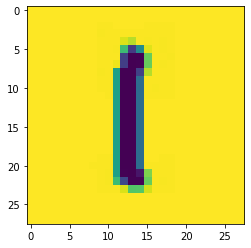

In [13]:
#!pip install opencv-python
import cv2
import matplotlib.pyplot as plt
import numpy as np


img = cv2.imread('test1.png',0)
plt.imshow(img)

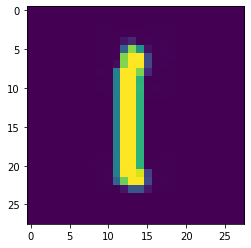

In [22]:
resized = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA)
x = np.invert(resized)
plt.imshow(x)

[[3.5491554e-05 2.2633809e-05 2.1352689e-04 9.9356163e-01 4.0554165e-04
  3.4557492e-05 1.8203000e-05 4.1378662e-03 3.4791531e-04 1.2225655e-03]]
3


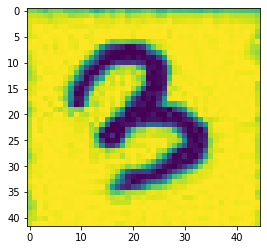

In [27]:
#!pip install opencv-python
import cv2
import matplotlib.pyplot as plt
import numpy as np


img = cv2.imread('test3.png',0)
plt.imshow(img)
resized = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA)
# print(resized.shape)

x = np.invert(resized)
# x = resized
# plt.imshow(x)
x = x.reshape(1,28,28,1)
x = x.astype('float32')
x /= 255

out = loaded_model.predict(x)
print(out)
print(np.argmax(out))

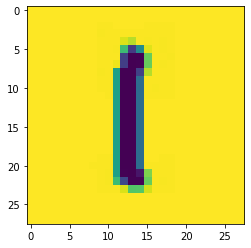

In [67]:
plt.imshow(resized)